# Understanding the pharmacogenics of microdosing using Topic Modelling

# Data Collection and Cleaning 

For data collection the pushshift api was utilised to download all posts and comments from the subreddit r/microdosing . Both files were downloaded as separate json files

The following script was created to download the posts - https://github.com/guneetsinghchatha/subreddit_downloader

# For Reddit Posts

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np

**Leading the file**

In [93]:
df = pd.read_json('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/Posts.JSON',lines = True)

**Displaying all the columns**

In [ ]:
df.columns.tolist()

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'suggested_sort',
 'thumbnail',
 'title

**Keeping only the selected columns**

In [ ]:
list = ['id','selftext','title','link_flair_text','created_utc']

In [ ]:
df2 = df[list]

**Converting all text data to strings**

In [ ]:
df2['selftext'] = df2['selftext'].apply(str)
df2['title'] = df2['title'].apply(str)
df2['link_flair_text'] = df2['link_flair_text'].apply(str)

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['selftext'] = df2['selftext'].apply(str)
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title'] = df2['title'].apply(str)
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

**Merging the post title and post content into one column and removing other columns**

In [ ]:
df2['paper_text'] = df2['title'] + " " + df2['selftext']

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1815562346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['paper_text'] = df2['title'] + " " + df2['selftext']


In [ ]:
final_headers = ['id','paper_text','link_flair_text','created_utc']

In [ ]:
df3 = df2[final_headers]

**Converting UTC time format for our analysis**

In [ ]:
df3['created_utc'] = pd.to_datetime(df3['created_utc'],  unit='s')
df3['created_utc_str'] = df3['created_utc'].dt.strftime('%Y-%m-%d')

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1701387166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['created_utc'] = pd.to_datetime(df3['created_utc'],  unit='s')
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1701387166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['created_utc_str'] = df3['created_utc'].dt.strftime('%Y-%m-%d')


**Adding prefix t3 as we will require this as an index for our join with comments**

In [ ]:
df3['link_id'] = "t3_" + df3['id']

**Final Dataframe**

In [ ]:
df3

,id,paper_text,link_flair_text,created_utc,created_utc_str,link_id
0,qic2l7,Dosage liverty caps Probbly a common question....,Question: Psilocybin,2021-10-29 12:49:15,2021-10-29,t3_qic2l7
1,qibj5e,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,2021-10-29 12:19:02,2021-10-29,t3_qibj5e
2,qibifv,Can Truffles change their effects after they g...,Question: Psilocybin,2021-10-29 12:17:47,2021-10-29,t3_qibifv
3,qiahat,Microdosing to stop overconsuming cannabis I a...,Question: LSD,2021-10-29 11:15:55,2021-10-29,t3_qiahat
4,qi8zia,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,2021-10-29 09:33:24,2021-10-29,t3_qi8zia
...,...,...,...,...,...,...
30955,1xojbz,Perks of microdosing LSD? Whats to gain from i...,nan,2014-02-12 04:30:05,2014-02-12,t3_1xojbz
30956,1wwiaq,question about microdosing and booze... hey fr...,nan,2014-02-03 16:41:34,2014-02-03,t3_1wwiaq
30957,1wj566,"Is it possible to ""microdose"" marijuana ? If t...",nan,2014-01-30 04:39:49,2014-01-30,t3_1wj566
30958,1wdj63,Advice on microdosing mushrooms? Throughout my...,nan,2014-01-28 15:36:34,2014-01-28,t3_1wdj63


# For Comments

In [ ]:
df_comments  = pd.read_json('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/mComments.JSON',lines=True)

In [ ]:
df_comments 

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],0.0,NaN,Ramstang95,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,NaN,Bodacious_Chad,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,NaN,NeuronsToNirvana,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,NaN,nonicknamenelly,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],0.0,NaN,Cacti_92,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340830,NaN,NaN,NaN,ruseweek,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.308161e+09,4.0,2629.0,NaN,NaN,NaN,NaN
340831,NaN,NaN,NaN,jedisjumphigh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.305510e+09,3.0,1824.0,NaN,NaN,NaN,NaN
340832,NaN,NaN,NaN,ruseweek,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.308161e+09,2.0,444.0,NaN,NaN,NaN,NaN
340833,NaN,NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1736.0,1.0,NaN,NaN,NaN


In [ ]:
df_comments.columns.to_list()

['all_awardings',
 'archived',
 'associated_award',
 'author',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'body',
 'body_sha1',
 'can_gild',
 'collapsed',
 'collapsed_because_crowd_control',
 'collapsed_reason',
 'collapsed_reason_code',
 'comment_type',
 'controversiality',
 'created_utc',
 'distinguished',
 'gilded',
 'gildings',
 'id',
 'is_submitter',
 'link_id',
 'locked',
 'no_follow',
 'parent_id',
 'permalink',
 'retrieved_utc',
 'score',
 'score_hidden',
 'send_replies',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_name_prefixed',
 'subreddit_type',
 'top_awarded_type',
 'total_awards_received',
 'treatment_tags',
 'unrepliable_reason',
 'awarders',
 'retrieved_on',
 'author_cakeday',
 'edited',
 'editable',
 'steward_reports',
 'updated_utc',
 'author_created

**Creating an index for the columns we need for our analysis and removing all un-necessary columns**

In [ ]:
index_comments = ['parent_id','id','link_id','body','author']

In [ ]:
dfc = df_comments[index_comments]

In [ ]:
dfc

,parent_id,id,link_id,body,author
0,t1_hihyv9r,hiii1xy,t3_qhqhj1,This is all good but do you cycle m.d.'ing fo...,Ramstang95
1,t1_hii3r64,hiigkf1,t3_qi5td0,That 1oz has to be fresh. Dried mushrooms lose...,Bodacious_Chad
2,t1_hihejey,hiievkr,t3_qhlcdz,Psychedelics did show great promise for mental...,NeuronsToNirvana
3,t3_qhqhj1,hiid0mq,t3_qhqhj1,I wouldn’t necessarily say it is the placebo e...,nonicknamenelly
4,t1_hiiaijm,hiibo5e,t3_qibj5e,"I’m not trying to prove them wrong, the answer...",Cacti_92
...,...,...,...,...,...
340830,t1_cct17iw,cct2ac9,t3_1ol4sl,".1 to .4 grams. At the low end, you're below t...",ruseweek
340831,t1_cct0g5g,cct17iw,t3_1ol4sl,That's fine I'm still wondering how much 100-4...,jedisjumphigh
340832,t1_cct09pk,cct0g5g,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...,ruseweek
340833,t3_1ol4sl,cct0f52,t3_1ol4sl,[deleted],[deleted]


**Converting body to string**

In [ ]:
dfc['body'] = dfc['body'].apply(str)

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/9555378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['body'] = dfc['body'].apply(str)


In [ ]:
dfc

,parent_id,id,link_id,body,author
0,t1_hihyv9r,hiii1xy,t3_qhqhj1,This is all good but do you cycle m.d.'ing fo...,Ramstang95
1,t1_hii3r64,hiigkf1,t3_qi5td0,That 1oz has to be fresh. Dried mushrooms lose...,Bodacious_Chad
2,t1_hihejey,hiievkr,t3_qhlcdz,Psychedelics did show great promise for mental...,NeuronsToNirvana
3,t3_qhqhj1,hiid0mq,t3_qhqhj1,I wouldn’t necessarily say it is the placebo e...,nonicknamenelly
4,t1_hiiaijm,hiibo5e,t3_qibj5e,"I’m not trying to prove them wrong, the answer...",Cacti_92
...,...,...,...,...,...
340830,t1_cct17iw,cct2ac9,t3_1ol4sl,".1 to .4 grams. At the low end, you're below t...",ruseweek
340831,t1_cct0g5g,cct17iw,t3_1ol4sl,That's fine I'm still wondering how much 100-4...,jedisjumphigh
340832,t1_cct09pk,cct0g5g,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...,ruseweek
340833,t3_1ol4sl,cct0f52,t3_1ol4sl,[deleted],[deleted]


**Removing all Automoderator posts**

In [ ]:
to_drop = ['AutoModerator']
dfd = dfc[~dfc['author'].isin(to_drop)]

**Merging all comments to master comment tree**

In [ ]:
dfc2 = dfd.groupby(['parent_id', 'link_id'])['body'].apply(' '.join).reset_index()

**Merging comment tree to top level comment**

In [ ]:
dfc3 = dfc2.groupby(['link_id'])['body'].apply(' '.join).reset_index()

In [ ]:
dfc3

,link_id,body
0,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...
1,t3_1olxep,I get nausea a lot from psychedelics and latel...
2,t3_1oqjdw,I personally only take them for specific situa...
3,t3_1oqzcu,Most report that it has a dysphoric side to it...
4,t3_1oxco2,[deleted] My advice is to carefully ask around...
...,...,...
30934,t3_qi7ev2,Which do you pick if you are 30 or 40 years ol...
30935,t3_qi8zia,Please read our Wiki and other links in the au...
30936,t3_qiahat,Not md but I know someone who quit smoking wee...
30937,t3_qibifv,"Yes, **fresh** mushrooms/[truffles](https://ww..."


# Merging posts and comments

In [ ]:
pandc = pd.merge(df3, dfc3, on="link_id", how= 'left')

In [ ]:
pandc

,id,paper_text,link_flair_text,created_utc,created_utc_str,link_id,body
0,qic2l7,Dosage liverty caps Probbly a common question....,Question: Psilocybin,2021-10-29 12:49:15,2021-10-29,t3_qic2l7,NaN
1,qibj5e,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,2021-10-29 12:19:02,2021-10-29,t3_qibj5e,"I’m not trying to prove them wrong, the answer..."
2,qibifv,Can Truffles change their effects after they g...,Question: Psilocybin,2021-10-29 12:17:47,2021-10-29,t3_qibifv,"Yes, **fresh** mushrooms/[truffles](https://ww..."
3,qiahat,Microdosing to stop overconsuming cannabis I a...,Question: LSD,2021-10-29 11:15:55,2021-10-29,t3_qiahat,Not md but I know someone who quit smoking wee...
4,qi8zia,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,2021-10-29 09:33:24,2021-10-29,t3_qi8zia,Please read our Wiki and other links in the au...
...,...,...,...,...,...,...,...
30955,1xojbz,Perks of microdosing LSD? Whats to gain from i...,nan,2014-02-12 04:30:05,2014-02-12,t3_1xojbz,[deleted] Apart from studying psych (I study c...
30956,1wwiaq,question about microdosing and booze... hey fr...,nan,2014-02-03 16:41:34,2014-02-03,t3_1wwiaq,[deleted] well since you are combining drinkin...
30957,1wj566,"Is it possible to ""microdose"" marijuana ? If t...",nan,2014-01-30 04:39:49,2014-01-30,t3_1wj566,Any source for this? &gt; Any source\n\nNot on...
30958,1wdj63,Advice on microdosing mushrooms? Throughout my...,nan,2014-01-28 15:36:34,2014-01-28,t3_1wdj63,When I microdosed 600mg of regular cubensis on...


**Removing all na columns**

In [ ]:
pandc = pandc.fillna('')

**Merging comment master to posts**

In [ ]:
pandc["posts"] = pandc["paper_text"] + " " + pandc["body"]

**Keeping only the required columns**

In [ ]:
merged_headers = ['link_id','created_utc','created_utc_str','posts','link_flair_text']

In [ ]:
dataset = pandc[merged_headers]

In [ ]:
dataset

,link_id,created_utc,created_utc_str,posts,link_flair_text
0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin
1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question
2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin
3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD
4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question
...,...,...,...,...,...
30955,t3_1xojbz,2014-02-12 04:30:05,2014-02-12,Perks of microdosing LSD? Whats to gain from i...,nan
30956,t3_1wwiaq,2014-02-03 16:41:34,2014-02-03,question about microdosing and booze... hey fr...,nan
30957,t3_1wj566,2014-01-30 04:39:49,2014-01-30,"Is it possible to ""microdose"" marijuana ? If t...",nan
30958,t3_1wdj63,2014-01-28 15:36:34,2014-01-28,Advice on microdosing mushrooms? Throughout my...,nan


**Saving to csv**

In [ ]:
dataset.to_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/MD_reports.csv')

# Initialisation

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import json
import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import seaborn as sns
import matplotlib as plt
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import contractions
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Importing stopwords**

In [2]:
stopwords = stopwords.words("english")
stopwords.extend(['https','microdosing','wwwredditcom','microdose'])

**Importing File**

In [3]:
papers = pd.read_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/MD_reports.csv')

In [4]:
papers

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question
...,...,...,...,...,...,...
30955,30955,t3_1xojbz,2014-02-12 04:30:05,2014-02-12,Perks of microdosing LSD? Whats to gain from i...,NaN
30956,30956,t3_1wwiaq,2014-02-03 16:41:34,2014-02-03,question about microdosing and booze... hey fr...,NaN
30957,30957,t3_1wj566,2014-01-30 04:39:49,2014-01-30,"Is it possible to ""microdose"" marijuana ? If t...",NaN
30958,30958,t3_1wdj63,2014-01-28 15:36:34,2014-01-28,Advice on microdosing mushrooms? Throughout my...,NaN


# Text pre-processing

**Expanding Contractions**

In [46]:
import re
papers['nolinks'] = papers['posts'].apply(lambda x: re.split('https:\/\/.*', str(x)))

<>:2: DeprecationWarning:

invalid escape sequence \/

<>:2: DeprecationWarning:

invalid escape sequence \/

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_3064/1903124241.py:2: DeprecationWarning:

invalid escape sequence \/



In [7]:
papers['no_contract'] = papers['nolinks'].apply(lambda x: [contractions.fix(word) for word in x.split()])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone..."


In [8]:
papers['posts_str'] = [' '.join(map(str, l)) for l in papers['no_contract']]
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ..."


**Tokenizing our words**

In [9]:
papers['tokenized'] = papers['posts_str'].apply(word_tokenize)
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo..."


**Conversion to Lowercase**

In [10]:
papers['lower'] = papers['tokenized'].apply(lambda x: [word.lower() for word in x])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo..."


**Removing Punctuations**

In [11]:
punc = string.punctuation
papers['no_punc'] = papers['lower'].apply(lambda x: [word for word in x if word not in punc])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,..."


**Removing stopwords**

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words = set(stopwords.words('english'))
papers['stopwords_removed'] = papers['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi..."


**Parts of speech tagging**

In [14]:
nltk.download('averaged_perceptron_tagger')
papers['pos_tags'] = papers['stopwords_removed'].apply(nltk.tag.pos_tag)
papers.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e..."


**Lemmatizing Words**

In [15]:
nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
papers['wordnet_pos'] = papers['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
papers.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro...","[(dosage, n), (liverty, n), (caps, n), (probbl..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)...","[(psilocybin, n), (mushroom, n), (find, v), (m..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS...","[(truffles, n), (change, v), (effects, n), (go..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin...","[(microdosing, v), (stop, n), (overconsuming, ..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e...","[(start, n), (microdosing, v), (hi, n), (every..."


In [16]:
wnl = WordNetLemmatizer()
papers['lemmatized'] = papers['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro...","[(dosage, n), (liverty, n), (caps, n), (probbl...","[dosage, liverty, cap, probbly, common, questi..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)...","[(psilocybin, n), (mushroom, n), (find, v), (m...","[psilocybin, mushroom, find, micro, dose, actu..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS...","[(truffles, n), (change, v), (effects, n), (go...","[truffle, change, effect, get, mild, stand, lo..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin...","[(microdosing, v), (stop, n), (overconsuming, ...","[microdosing, stop, overconsuming, cannabis, c..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e...","[(start, n), (microdosing, v), (hi, n), (every...","[start, microdosing, hi, everyone, curious, mi..."


In [17]:
papers.to_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/microdosing_scrape_clean.csv')

# Exploratory Data Analysis

**Keeping only the required columns**

In [2]:
master_posts = pd.read_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/microdosing_scrape_clean.csv')
master_posts.head(5)

,Unnamed: 0,Unnamed: 0.1,link_id,created_utc,created_utc_str,posts,link_flair_text,nolinks,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,Dosage liverty caps Probbly a common question....,"['Dosage', 'liverty', 'caps', 'Probbly', 'a', ...",Dosage liverty caps Probbly a common question....,"['Dosage', 'liverty', 'caps', 'Probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'comm...","[('dosage', 'NN'), ('liverty', 'NN'), ('caps',...","[('dosage', 'n'), ('liverty', 'n'), ('caps', '...","['dosage', 'liverty', 'cap', 'probbly', 'commo..."
1,1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,Psilocybin mushroom How do you find out if mic...,"['Psilocybin', 'mushroom', 'How', 'do', 'you',...",Psilocybin mushroom How do you find out if mic...,"['Psilocybin', 'mushroom', 'How', 'do', 'you',...","['psilocybin', 'mushroom', 'how', 'do', 'you',...","['psilocybin', 'mushroom', 'how', 'do', 'you',...","['psilocybin', 'mushroom', 'find', 'micro', 'd...","[('psilocybin', 'NN'), ('mushroom', 'NN'), ('f...","[('psilocybin', 'n'), ('mushroom', 'n'), ('fin...","['psilocybin', 'mushroom', 'find', 'micro', 'd..."
2,2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,Can Truffles change their effects after they g...,"['Can', 'Truffles', 'change', 'their', 'effect...",Can Truffles change their effects after they g...,"['Can', 'Truffles', 'change', 'their', 'effect...","['can', 'truffles', 'change', 'their', 'effect...","['can', 'truffles', 'change', 'their', 'effect...","['truffles', 'change', 'effects', 'got', 'mild...","[('truffles', 'NNS'), ('change', 'VBP'), ('eff...","[('truffles', 'n'), ('change', 'v'), ('effects...","['truffle', 'change', 'effect', 'get', 'mild',..."
3,3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,Microdosing to stop overconsuming cannabis I a...,"['Microdosing', 'to', 'stop', 'overconsuming',...",Microdosing to stop overconsuming cannabis I a...,"['Microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'stop', 'overconsuming', 'cann...","[('microdosing', 'VBG'), ('stop', 'NN'), ('ove...","[('microdosing', 'v'), ('stop', 'n'), ('overco...","['microdosing', 'stop', 'overconsuming', 'cann..."
4,4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"How to start microdosing ? Hi, everyone,\n\nI'...","['How', 'to', 'start', 'microdosing', '?', 'Hi...","How to start microdosing ? Hi, everyone, I am ...","['How', 'to', 'start', 'microdosing', '?', 'Hi...","['how', 'to', 'start', 'microdosing', '?', 'hi...","['how', 'to', 'start', 'microdosing', 'hi', 'e...","['start', 'microdosing', 'hi', 'everyone', 'cu...","[('start', 'NN'), ('microdosing', 'VBG'), ('hi...","[('start', 'n'), ('microdosing', 'v'), ('hi', ...","['start', 'microdosing', 'hi', 'everyone', 'cu..."


In [3]:
eda_list = ["lemmatized","created_utc","link_flair_text","tokenized"]

In [4]:
md_submissions = master_posts[eda_list]

**Code Frequency Analysis**

In [5]:
md_submissions['word_count'] = md_submissions['lemmatized'].apply(lambda x: len(str(x).split()))

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_16598/2954533847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_submissions['word_count'] = md_submissions['lemmatized'].apply(lambda x: len(str(x).split()))


Average Number of words per flair category

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8995 (\N{SMILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


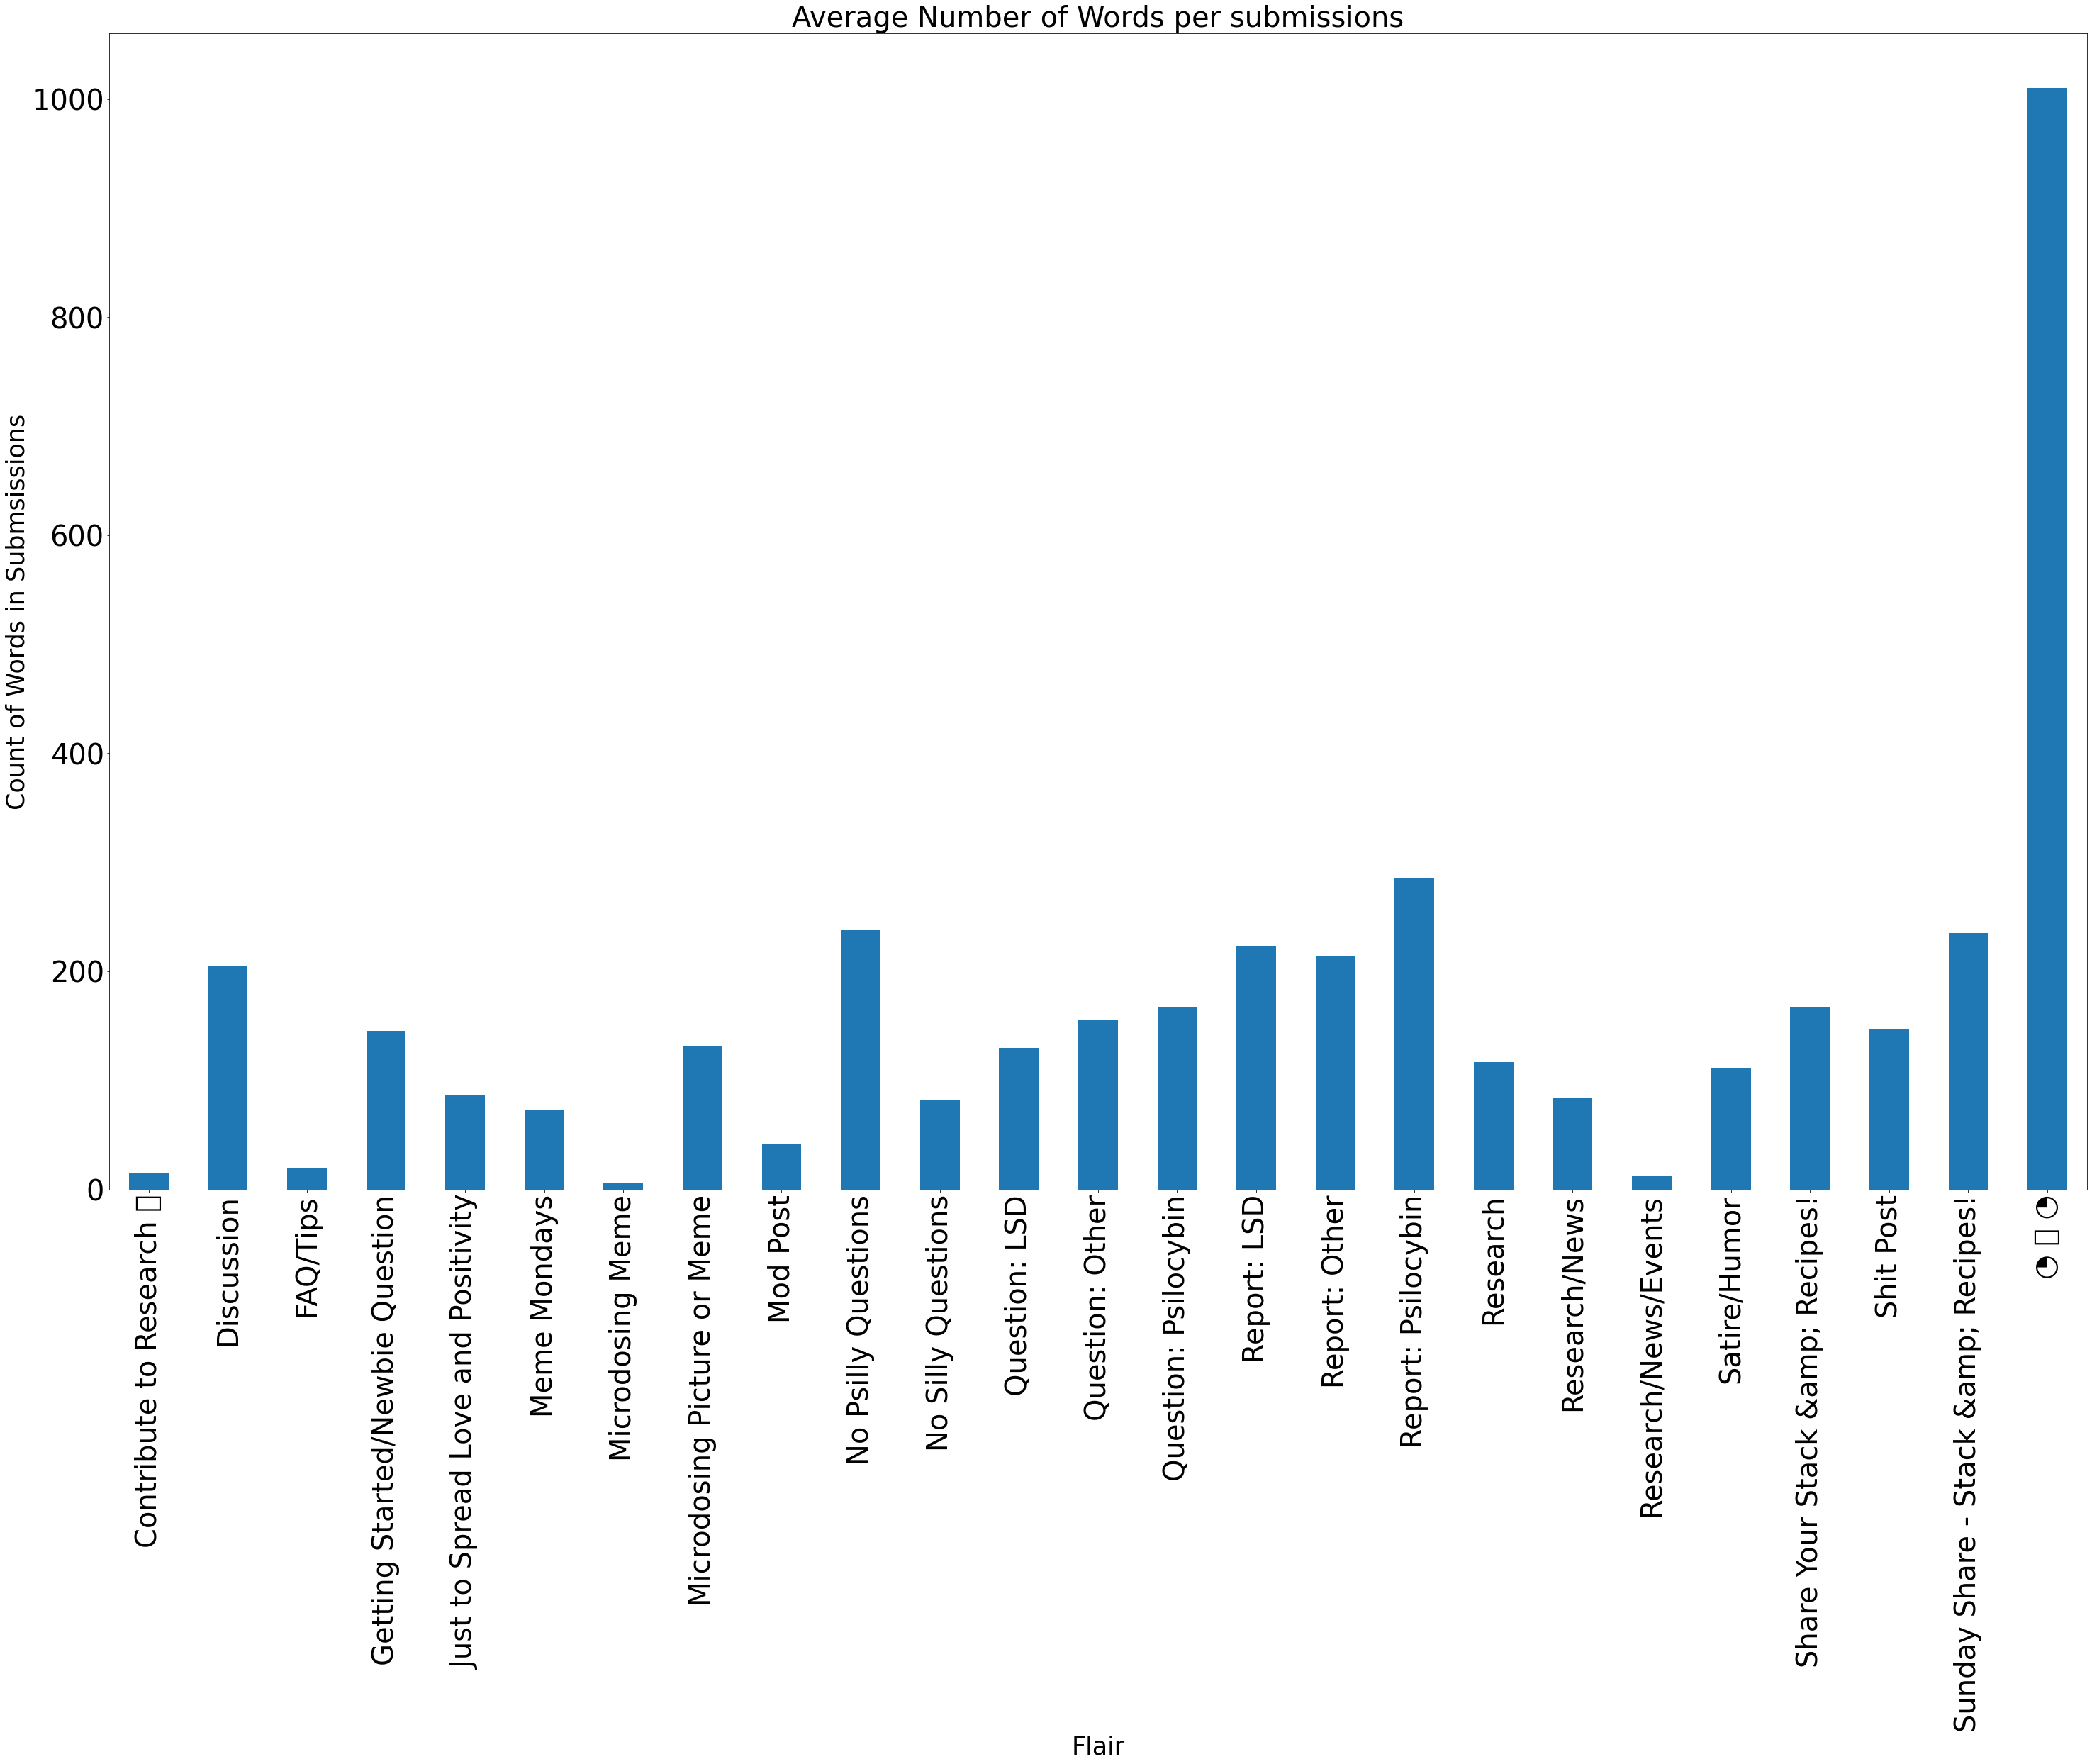

In [7]:
import matplotlib.pyplot as plt
word_avg = md_submissions.groupby('link_flair_text')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Flair', fontsize=35)
plt.ylabel('Count of Words in Submsissions', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per submissions', fontsize=40)
plt.show()

Word count distribution

In [7]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Unigram Distribution

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(md_submissions['lemmatized'], 30)
for word, freq in common_words:
    print(word, freq)
df1a = pd.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df1a.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 Unigrams')


day 64903
take 63533
dose 54225
get 52692
like 51868
would 51824
microdosing 49564
feel 47339
go 41766
time 37106
try 35073
think 34245
lsd 34042
good 32076
make 31937
start 31064
work 30663
much 29371
help 28907
use 28273
know 28036
experience 26776
effect 25827
really 25752
also 25126
well 25090
one 24459
want 24044
md 22752
thing 22302


Top bigrams distribution

In [11]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(md_submissions['lemmatized'], 30)
for word, freq in common_words:
    print(word, freq)
df3a = pd.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df3a.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 30 bigrams')


feel like 8058
micro dose 6657
every day 5927
first time 4621
lion mane 4042
start microdosing 3887
day day 3672
would like 3072
good luck 2956
would say 2780
side effect 2755
microdosing lsd 2702
amp x200b 2570
sound like 2557
dose day 2466
long term 2386
distilled water 2358
make feel 2353
1p lsd 2334
md ing 2321
low dose 2278
felt like 2243
make sure 2105
try microdosing 2053
one day 2039
seem like 1926
year ago 1846
depression anxiety 1841
micro dosing 1814
mental health 1810


Make sure to change dataframe to master posts and the right column for this 

Top Trigrams

In [12]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(md_submissions['lemmatized'], 30)
for word, freq in common_words:
    print(word, freq)
df5a = pd.DataFrame(common_words, columns = ['lemmatized' , 'count'])
df5a.groupby('lemmatized').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 trigrams')

find sweet spot 798
every third day 648
would love hear 455
anyone else experience 427
day two day 426
dose every day 419
every three day 413
take lion mane 394
every 3rd day 379
start micro dose 372
negative side effect 361
first time microdosing 359
lion mane niacin 358
want try microdosing 355
take every day 337
use distilled water 332
long term effect 331
day day day 329
would like know 315
one day two 311
make feel like 291
would like try 278
every 4th day 275
want start microdosing 263
feel like need 261
start md ing 261
take full dose 261
mental health issue 241
first thing morning 231
want make sure 231


**Posts made over time**

Converting utc to pandas date type

In [13]:
md_submissions['created_utc'] = md_submissions['created_utc'].apply(str)
md_submissions['created_utc'] = pd.to_datetime(md_submissions['created_utc'])

Oldest and Newest post

In [14]:
print(md_submissions['created_utc'].min())
print(md_submissions['created_utc'].max())

2014-01-07 08:51:29
2021-10-29 12:49:15


In total we have around 7 years of posts from the subreddit 

In [17]:
time_plot = md_submissions.groupby(md_submissions['created_utc'].dt.date)['lemmatized'].count()
time_plot.iplot()

**Length of submissions**

In [18]:
display(md_submissions['word_count'].describe())

count    30960.000000
mean       173.525258
std        238.256467
min          1.000000
25%         41.000000
50%        100.000000
75%        213.000000
max       4611.000000
Name: word_count, dtype: float64

# LDA

In [19]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [23]:
data = md_submissions.lemmatized.values.tolist()
data_words = list(sent_to_words(data))

In [53]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https','microdosing','wwwredditcom','microdose','would','get','take','go','lsd','much','one','start','try','think','day'])

In [54]:
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['dosage', 'liverty', 'cap', 'probbly', 'common', 'question', 'daily', 'dose', 'libirty', 'cap', 'many']


In [55]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[20])

[(4, 3), (12, 2), (17, 1), (30, 1), (32, 3), (59, 2), (61, 1), (64, 1), (67, 1), (77, 1), (89, 2), (96, 1), (100, 1), (102, 1), (109, 2), (118, 1), (136, 1), (145, 1), (150, 1), (162, 1), (182, 1), (201, 1), (206, 3), (207, 3), (212, 1), (215, 8), (218, 1), (219, 1), (220, 1), (254, 1), (277, 1), (312, 1), (335, 1), (373, 1), (429, 1), (442, 1), (491, 1), (592, 1), (639, 1), (666, 1), (676, 1), (812, 1), (819, 1), (938, 1), (956, 1), (1161, 1), (1169, 1), (1237, 1), (1268, 1), (1269, 1), (1270, 1), (1271, 1), (1272, 2), (1273, 2), (1274, 1), (1275, 1), (1276, 1), (1277, 1), (1278, 1), (1279, 1), (1280, 1), (1281, 1), (1282, 1), (1283, 1), (1284, 2)]


In [56]:
from gensim.models import Word2Vec

In [57]:
from pprint import pprint

num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"like" + 0.011*"dose" + 0.010*"feel" + 0.008*"make" + 0.008*"work" + '
  '0.008*"good" + 0.007*"time" + 0.007*"know" + 0.006*"experience" + '
  '0.006*"effect"'),
 (1,
  '0.015*"dose" + 0.012*"feel" + 0.010*"like" + 0.008*"time" + 0.007*"make" + '
  '0.007*"help" + 0.006*"really" + 0.006*"good" + 0.006*"well" + '
  '0.006*"effect"'),
 (2,
  '0.011*"dose" + 0.011*"like" + 0.010*"time" + 0.010*"feel" + '
  '0.007*"experience" + 0.006*"trip" + 0.006*"effect" + 0.006*"good" + '
  '0.006*"find" + 0.006*"work"'),
 (3,
  '0.011*"dose" + 0.011*"feel" + 0.010*"like" + 0.008*"good" + 0.007*"make" + '
  '0.007*"time" + 0.007*"work" + 0.006*"experience" + 0.006*"really" + '
  '0.006*"help"'),
 (4,
  '0.011*"dose" + 0.009*"like" + 0.009*"time" + 0.008*"help" + 0.008*"feel" + '
  '0.008*"want" + 0.007*"know" + 0.006*"good" + 0.006*"also" + 0.006*"make"')]


In [50]:
import pyLDAvis.gensim_models

In [58]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.003615 -0.003714       1        1  22.686025
1     -0.000721  0.004100       2        1  22.163204
0     -0.002369 -0.003723       3        1  20.370364
2     -0.004214  0.001176       4        1  18.810691
3      0.003689  0.002162       5        1  15.969716, topic_info=        Term          Freq         Total Category  logprob  loglift
31      like  50057.000000  50057.000000  Default  30.0000  30.0000
87        md  20007.000000  20007.000000  Default  29.0000  29.0000
25      feel  46445.000000  46445.000000  Default  28.0000  28.0000
145     good  31165.000000  31165.000000  Default  27.0000  27.0000
739  shrooms  13681.000000  13681.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
108     trip   3219.361400  21358.121712   Topic5  -5.4271  -0.0578
209    thing   3196.749889  21738.967345   Topic5  -5.4342  -0.0825
12      also   3235.906682  24734.561423   Topic5  -5.4220  -0.1994
47       say   2954.091547  21722.021791   Topic5  -5.5131  -0.1607
59      want   2963.526652  23999.649908   Topic5  -5.5099  -0.2572

[421 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
385        1  0.191522    able
385        2  0.189658    able
385        3  0.215132    able
385        4  0.242160    able
385        5  0.161543    able
...      ...       ...     ...
7949       1  0.196890  yeeeep
7949       3  0.590671  yeeeep
53661      5  0.861616   zomba
26228      1  0.831472     аnd
26235      1  0.836295      оf

[801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

In [59]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -7.640601571310748


In [85]:
print("Log Likelihood: ", lda_model.score(lemmatized))

AttributeError: 'LdaMulticore' object has no attribute 'score'

# LSA

In [66]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
reindexed_data = md_submissions['lemmatized']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    from collections import Counter
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  day microdosing dose
Topic 2:  water tab vodka
Topic 3:  remove microdosing lsd
Topic 4:  day tolerance dose
Topic 5:  capsule lion mane
Topic 6:  delete trip lsd


# NMF

In [6]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

documents = md_submissions
documents.head()

,lemmatized,created_utc,link_flair_text,tokenized,word_count
0,"['dosage', 'liverty', 'cap', 'probbly', 'commo...",2021-10-29 12:49:15,Question: Psilocybin,"['Dosage', 'liverty', 'caps', 'Probbly', 'a', ...",11
1,"['psilocybin', 'mushroom', 'find', 'micro', 'd...",2021-10-29 12:19:02,Getting Started/Newbie Question,"['Psilocybin', 'mushroom', 'How', 'do', 'you',...",76
2,"['truffle', 'change', 'effect', 'get', 'mild',...",2021-10-29 12:17:47,Question: Psilocybin,"['Can', 'Truffles', 'change', 'their', 'effect...",13
3,"['microdosing', 'stop', 'overconsuming', 'cann...",2021-10-29 11:15:55,Question: LSD,"['Microdosing', 'to', 'stop', 'overconsuming',...",70
4,"['start', 'microdosing', 'hi', 'everyone', 'cu...",2021-10-29 09:33:24,Getting Started/Newbie Question,"['How', 'to', 'start', 'microdosing', '?', 'Hi...",246


In [7]:
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')

# Fit and transform
X = vect.fit_transform(documents.lemmatized)

In [8]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)

# Fit the model to TF-IDF
model.fit(X)

# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [9]:
X.shape

(30960, 4962)

In [10]:
nmf_features.shape

(30960, 10)

In [11]:
model.components_.shape

(10, 4962)

In [13]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,001,001g,01,01g,02,025,02g,03,...,yup,zap,zen,zero,zoloft,zombie,zone,zoom,µg,μg
0,0.000000,0.002864,0.000000,0.000000,0.002172,0.000000,0.007137,0.000342,0.000000,0.001869,...,0.018938,0.030935,0.013493,0.038495,0.065978,0.018252,0.030839,0.013585,0.000000,0.000000
1,0.000000,0.001208,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009762,0.000000,0.000000,0.003924,0.000000,0.000000,0.000000,0.000270,0.010863,0.010657
2,0.000000,0.000296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000330,0.005666,0.000000,0.005882,...,0.005774,0.000053,0.000000,0.024245,0.000990,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.310599,0.067037,0.032970,0.031212,0.054114,0.042047,0.021495,0.004778,0.009824,0.027552,...,0.019241,0.000000,0.000000,0.028145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.005375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000869,0.000000,0.025046,0.012456
6,0.001857,0.002884,0.000000,0.000000,0.000000,0.000000,0.002349,0.002809,0.000000,0.002905,...,0.003127,0.001255,0.000000,0.000000,0.000000,0.001049,0.000000,0.002456,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000979,...,0.000000,0.020842,0.000000,0.010849,0.089096,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006311,0.000000,0.002591,0.013513,0.000000,0.000000,0.000000,0.000000,0.000000,0.002067
9,0.000000,0.000000,0.000398,0.000304,0.025968,0.015817,0.024177,0.010209,0.016183,0.018232,...,0.011121,0.000000,0.000793,0.008198,0.000000,0.002283,0.028162,0.000000,0.017050,0.013915


In [21]:
components_df['addiction']

0    0.181849
1    0.000000
2    0.013458
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.021103
8    0.000000
9    0.000000
Name: addiction, dtype: float64

In [12]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
like       1.268525
help       1.193077
feel       1.058886
think      0.984081
thing      0.970276
anxiety    0.965591
make       0.943754
life       0.920369
good       0.877746
really     0.858888
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
water        2.608152
tab          1.730224
vodka        1.273954
bottle       0.931994
distilled    0.902311
use          0.822576
dissolve     0.810411
solution     0.744172
distil       0.727417
ml           0.714643
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
remove         4.041850
microdosing    0.170597
question       0.167314
microdose      0.110198
advice         0.103658
micro          0.096647
md             0.071435
truffle        0.068404
mding          0.050017
dosing         0.045955
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
day          3.815994
week         0.885941
md           0.778

***NMF seems to yield the best results as each topic can be easily quantified**

Topic 1 : Talks about feelings associated with microdosing

Topic 2 : Includes all topics associated with volumetric dosing of LSD

Topic 3 : Includes advice related to microdosing

Topic 4 : Includes topics related to dosing protocol

Topic 5 : Includes topics related to microdosing psilocybin

Topic 6 : includes all other substances being microdosed

Topic 7 : Contains everything related to Stamets Stack

Topic 8 : Contains insights into anxiety and depression

In [13]:
my_document = documents.lemmatized[55]
my_document

"['2g', 'truffle', 'dose', 'anyone', 'take', 'recommend', '1g', 'dose', 'truffle', 'noticed', 'much', 'different', 'two', 'month', 'microdosing', '1g', 'every', 'three', 'day', 'think', 'try', '2g', 'right', 'could', 'take', '2g', 'instead', '0,4g', 'high', 'hawaiian', 'think', 'would', 'give', 'good', 'mood', 'turn', 'tolerance', 'quite', 'low', 'give', 'full', 'trip', 'take', 'time', 'couch', 'go', 'flow', 'process', 'feeling', 'able', 'go', 'day', 'reasonably', 'strong', 'trip', 'take', 'around', '6g', 'give', 'visuals', 'insight', 'try', 'take', 'macro', 'first', 'use', 'microdosing', 'way', 'maintain', 'result', 'would', 'say', '1g', 'daily', 'probably', 'enough', 'eta', 'much', 'good', 'result', '5', 'day', 'on/2', 'day', 'protocol', 'delete']"

In [14]:
pd.DataFrame(nmf_features).loc[55]

0    0.000000
1    0.000000
2    0.000139
3    0.047607
4    0.018408
5    0.000000
6    0.001941
7    0.018675
8    0.034240
9    0.031320
Name: 55, dtype: float64

# HLDA

In [72]:
all_texts = md_submissions.lemmatized
all_texts[111]

"['experience', 'far', 'microdosing', 'shrooms', 'snri', 'sorry', 'long', 'text…', 'tldr', 'see', 'much', 'difference', '4months', 'put', 'snri', 'last', 'year', 'seek', 'help', 'regain', 'motivation', 'towards', 'work', 'life', 'general', 'suppose', 'start', 'med', 'also', 'change', 'couple', 'small', 'thing', 'life', 'feel', 'everything', 'really', 'change', 'best', '6-7', 'month', 'felt', 'like', 'slowly', 'return', 'place', 'unmotivated', 'easily', 'annoy', 'impatient', 'etc', 'dig', 'around', 'web', 'decide', 'try', 'microdosing', 'shrooms', 'use', 'crush', 'dried', 'shrooms', 'swallow', '0.25g', '0.30g', 'every', '3', 'day', 'first', '2', 'month', 'also', '2', 'macro', 'dos', 'plesant', 'nice', 'introspection', 'lot', 'visuals', 'anyway', 'little', '4', 'month', 'honestly', 'say', 'positive', 'impact', 'know', 'ssri', 'snri', 'know', 'reduce', 'effect', 'psylocibin', 'still', 'regular', 'trip', 'macro', 'dos', 'plan', 'slowly', 'stop', 'med', 'shrooms', 'really', 'fence', 'sure',

In [77]:
from nltk.util import ngrams
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
from collections import Counter
bigrams = []
for article in all_texts:
    bigrams += list(map(lambda x: x[0], list(filter(lambda x: x[1] >= 5, Counter(get_ngrams(article, 2)).most_common()))))

bigrams = list(filter(lambda x: 'package' not in x and 'document' not in x, bigrams))
bigrams = list(map(lambda x: x[0], (list(filter(lambda x: x[1] >= 5, Counter(bigrams).most_common())))))

**Tried installing bigartm - got the error**
(base) guneetsingh@Guneets-MacBook-Air Desktop % pip install bigartm-0.9.2-cp38-cp38-manylinux1_x86_64.whl
ERROR: bigartm-0.9.2-cp38-cp38-manylinux1_x86_64.whl is not a supported wheel on this platform.


# Biterm Topic Model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

texts = md_submissions.lemmatized
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(texts).toarray()

In [16]:
    from biterm.utility import vec_to_biterms

    vocab = np.array(vec.get_feature_names_out())
    biterms = vec_to_biterms(X)

In [ ]:
from biterm.cbtm import oBTM

btm = oBTM(num_topics=20, V=vocab)
topics = btm.fit_transform(biterms, iterations=100)

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_11703/655884372.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from biterm.cbtm import oBTM
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_11703/655884372.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, c

In [ ]:
 vis = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))

In [ ]:
topic_summuary(btm.phi_wz.T, X, vocab, 10)

**BTM** seems to be taking a lot of time to run (ran it for 7 hours)

# Pending Items

1. HLDA - yet to try alternative libraries

2. Biterm - Perhaps if i have a look at last tutorials codebook i can optimize my process for biterm since it seems to be running for a very long time

3. Play with multiple iterations with and without lemmatized and stop word removal to see if there are any changes in the results